# Chargement du jeu de données

Ce papier utilise les données issues de <a href = "https://www.emploi-store-dev.fr/portail-developpeur-cms/home/catalogue-des-api/documentation-des-api/api/api-offres-demploi-v2.html">l'API Offres Emploi V2 </a> disponible sur le 

In [1]:
from offres_emploi import Api

In [2]:
client = Api(client_id="PAR_projetpythonensaeparis_fa0da8af27775fc0f909f013e943743fa1efdc9fd866d9ff0b032e31889cdde0", 
             client_secret="2e3a71554180da56e6495f5fa5e8d1fd3ac3bd522d5538dd5c993993b29594c0")

In [4]:
client

In [5]:
basic_search = client.search()

Making request with params None
Token has not been requested yet. Requesting token
Now requesting token


In [6]:
basic_search["Content-Range"]

{'first_index': '0', 'last_index': '149', 'max_results': '219978'}

In [97]:
from offres_emploi.utils import dt_to_str_iso
import datetime

start_dt = datetime.datetime(2019, 6, 1)
end_dt = datetime.datetime(2020, 12, 1)
params = {
     'range' : '150-299',
    'periodeSalaire' : 'M',
    'minCreationDate': dt_to_str_iso(start_dt),
    'maxCreationDate': dt_to_str_iso(end_dt)
}
search_covid = client.search(params=params)

Making request with params {'range': '150-299', 'periodeSalaire': 'M', 'minCreationDate': '2019-06-01T00:00:00Z', 'maxCreationDate': '2020-12-01T00:00:00Z'}


In [91]:
filters = search_covid['filtresPossibles']
results =  search_covid['resultats']
content_range = search_covid['Content-Range']
content_range

{'first_index': '50', 'last_index': '99', 'max_results': '155388'}

In [39]:
from offres_emploi.utils import filters_to_df
filters_df = filters_to_df(filters)

<AxesSubplot:xlabel='nb_resultats', ylabel='valeur_possible'>

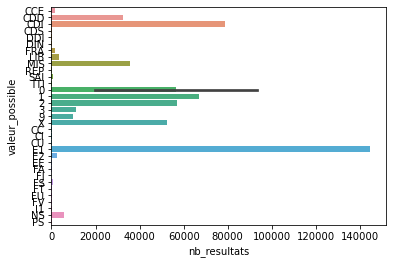

In [40]:
import seaborn as sns
sns.barplot(data=filters_df, y="valeur_possible", x="nb_resultats")

In [75]:
import pandas as pd
results_df = pd.DataFrame(results)
salary_by_enterprise = (
 results_df[['entreprise', 'salaire']]
 .dropna()
 .agg(dict(entreprise=lambda x: x.get('nom'),
           salaire=lambda x: x.get('commentaire')))
 .dropna(subset=["salaire"])
 .loc[lambda df: df.salaire.str.contains("\d+")]
 .sort_values("salaire")
)

In [77]:
df=results_df [['entreprise', 'salaire']]
df

,entreprise,salaire
0,{'description': 'La 3WRH accompagne les profil...,"{'libelle': 'Mensuel de 600,00 Euros à 900,00 ..."
1,{'description': 'La 3WRH accompagne les profil...,"{'libelle': 'Mensuel de 600,00 Euros à 900,00 ..."
2,{'nom': 'ELFY PROPRETE'},"{'libelle': 'Horaire de 10,30 Euros à 10,30 Eu..."
3,{'description': 'La 3WRH accompagne les profil...,"{'libelle': 'Mensuel de 600,00 Euros à 900,00 ..."
4,{'nom': 'DOCTEUR EN CHIRURGIE DENTAIRE'},"{'libelle': 'Mensuel de 662,00 Euros à 1539,42..."
...,...,...
145,{'description': 'Soins de Suite - Réadaptati...,NaN
146,{'nom': 'NOVOTEL'},"{'libelle': 'Mensuel de 1600,00 Euros à 1800,0..."
147,NaN,NaN
148,{'description': 'Entreprise d'animation commer...,"{'commentaire': '90 /JOUR', 'complement1': '90..."


In [76]:
print(salary_by_enterprise)

                        entreprise  \
139                 NAVILAND CARGO   
96               Al Conseiljob/kip   
32             CMA HAUTS-DE-FRANCE   
51             HIOLLE TECHNOLOGIES   
64                        RANDSTAD   
..                             ...   
0                             3WRH   
4    DOCTEUR EN CHIRURGIE DENTAIRE   
9                             3WRH   
6                             3WRH   
47                           EATEC   

                                               salaire  
139  Annuel de 20800,00 Euros à 21000,00 Euros sur ...  
96         Annuel de 25000,00 Euros ï¿¿ 30000,00 Euros  
32   Annuel de 29000,00 Euros à 34000,00 Euros sur ...  
51   Annuel de 30000,00 Euros à 37000,00 Euros sur ...  
64                Annuel de 38000,00 Euros sur 12 mois  
..                                                 ...  
0    Mensuel de 600,00 Euros à 900,00 Euros sur 12 ...  
4    Mensuel de 662,00 Euros à 1539,42 Euros sur 12...  
9         Mensuel de 800 Euros

In [71]:
df ['salaire'][0].values()

dict_values(['Mensuel de 600,00 Euros à 900,00 Euros sur 12 mois'])

In [79]:
df=results_df [['id', 'intitule', 'description','dateCreation','typeContrat','experienceExige','salaire','nombrePostes','qualificationCode','secteurActivite','secteurActiviteLibelle']]


In [80]:
df

,id,intitule,description,dateCreation,typeContrat,experienceExige,salaire,nombrePostes,qualificationCode,secteurActivite,secteurActiviteLibelle
0,107YRMN,Pré-apprentissage - Développeur Web Junior ...,"Cet automne, le Concours qui casse les Codes e...",2020-11-30T23:59:06+01:00,CDI,D,"{'libelle': 'Mensuel de 600,00 Euros à 900,00 ...",1,5,62,Conseil en systèmes et logiciels informatiques
1,107YRMM,Pré-apprentissage - Développeur Web Junior ...,"Cet automne, le Concours qui casse les Codes e...",2020-11-30T23:56:06+01:00,CDI,D,"{'libelle': 'Mensuel de 600,00 Euros à 900,00 ...",1,5,62,Conseil en systèmes et logiciels informatiques
2,107YRML,Agent / Agente de nettoyage industriel (H/F),"Pour du nettoyage de bureaux, nous recherchons...",2020-11-30T23:54:55+01:00,CDI,D,"{'libelle': 'Horaire de 10,30 Euros à 10,30 Eu...",1,1,81,Nettoyage courant des bâtiments
3,107YRMK,Pré-apprentissage - Développeur Web Junior (...,"Cet automne, le Concours qui casse les Codes e...",2020-11-30T23:54:07+01:00,CDI,D,"{'libelle': 'Mensuel de 600,00 Euros à 900,00 ...",1,5,62,Conseil en systèmes et logiciels informatiques
4,107YRMB,Assistant / Assistante dentaire (H/F),Cabinet Dentaire d'omnipratique à Ligny-en-Bar...,2020-11-30T23:42:25+01:00,CDD,D,"{'libelle': 'Mensuel de 662,00 Euros à 1539,42...",1,5,86,Pratique dentaire
...,...,...,...,...,...,...,...,...,...,...,...
145,7926200,Conseiller / Conseillère en insertion profess...,Le Centre Médical et Pédagogique Jacques Arna...,2020-11-30T19:47:32+01:00,CDI,E,NaN,1,X,NaN,NaN
146,107YRDF,Réceptionniste en hôtellerie (H/F),La première impression est toujours la bonne! ...,2020-11-30T19:46:25+01:00,CDI,E,"{'libelle': 'Mensuel de 1600,00 Euros à 1800,0...",1,5,55,Hôtels et hébergement similaire
147,7925849,Educateur spécialisé / Educatrice spécialisée...,L'association AIMCP Loire recrute pour le CD...,2020-11-30T19:46:09+01:00,CDI,E,NaN,1,X,NaN,NaN
148,107YRDD,Animateur / Animatrice de ventemateur / Animat...,Recherche animateur/animatrice en stand foie g...,2020-11-30T19:46:07+01:00,CDD,E,"{'commentaire': '90 /JOUR', 'complement1': '90...",1,6,73,Activités des agences de publicité
